In [1]:
# Load libraries
import pandas as pd

data = pd.read_csv('online_adapt.csv')
data.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Text(0.5, 1.0, 'Age Count Distribution')

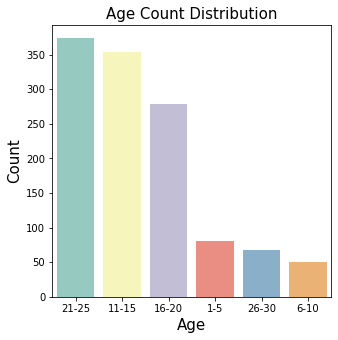

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

sns.countplot(x='Age', data=data, palette='Set3', order = data['Age'].value_counts().index)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)

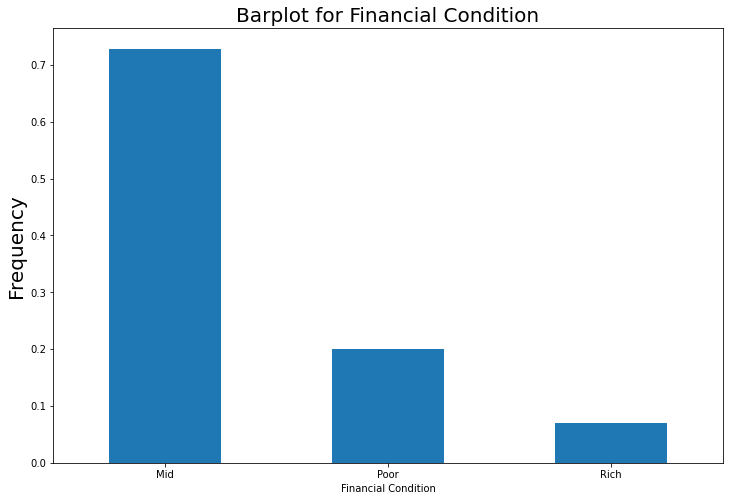

In [44]:
fig = df.plot.bar(x='Financial Condition', rot=0, figsize=(12,8)) 
fig.set_title('Barplot for Financial Condition', fontsize=20)
fig.set_ylabel('Frequency', fontsize=20)
fig.legend_.remove()


<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

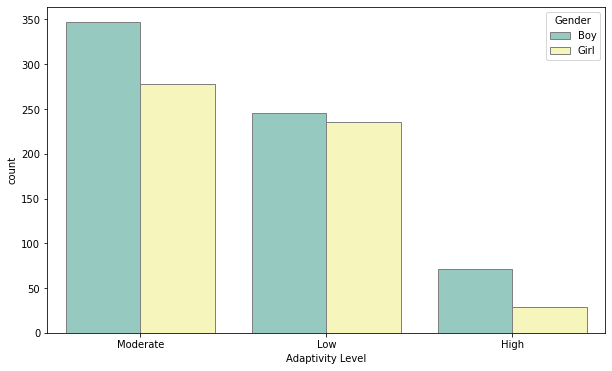

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(x='Adaptivity Level', hue='Gender', data=data, palette='Set3', edgecolor='gray')

<AxesSubplot:xlabel='Gender', ylabel='count'>

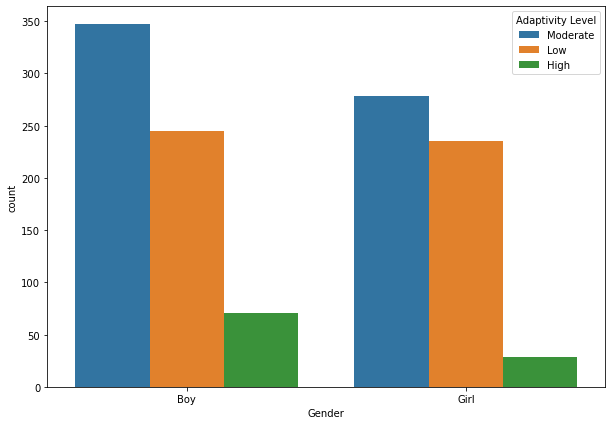

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(hue='Adaptivity Level', x='Gender', data=data)

Text(0, 0.5, 'Gender')

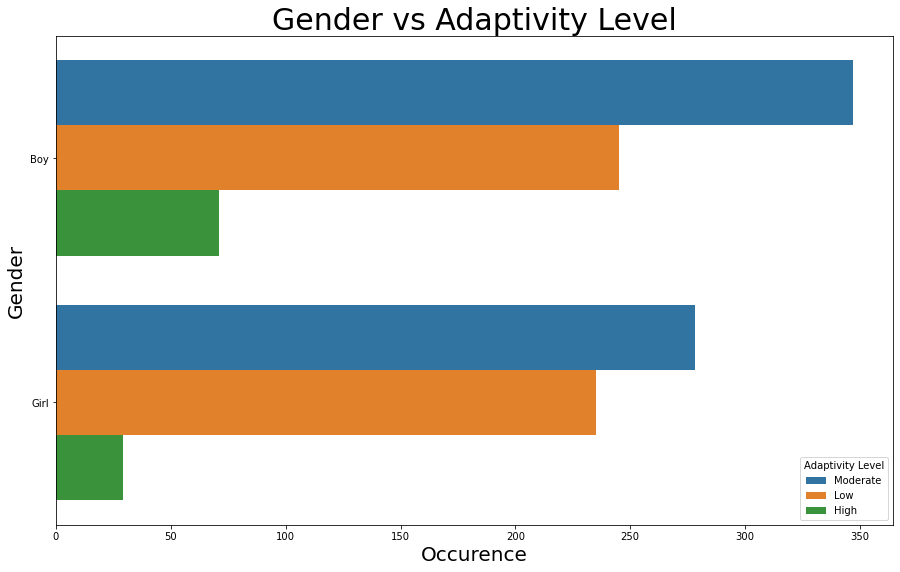

In [52]:
plt.figure(figsize=(15,9))
ax=sns.countplot(hue='Adaptivity Level', y='Gender', data=data, orient='h')
ax.set_title('Gender vs Adaptivity Level', fontsize=30)
ax.set_xlabel('Occurence', fontsize=20)
ax.set_ylabel('Gender', fontsize=20)

Text(0.5, 1.0, 'Boys')

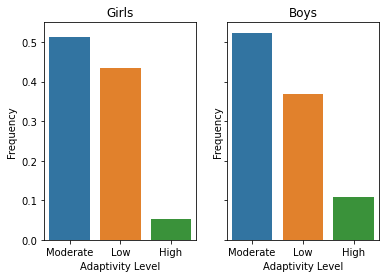

In [140]:
data_girl = data[data["Gender"] == "Girl"]
data_boy = data[data["Gender"] == "Boy"]

tb_al1 = data_girl['Adaptivity Level'].value_counts(normalize=True)
al1 = tb_al1.index

tb_al2 = data_boy['Adaptivity Level'].value_counts(normalize=True)
al2 = tb_al2.index

dfg = pd.DataFrame({'Adaptivity Level':al1, 'Frequency':tb_al1})
dfm = pd.DataFrame({'Adaptivity Level':al2, 'Frequency':tb_al2})

fig, axes = plt.subplots(1, 2, sharex='col', sharey='row')


sns.barplot(x='Adaptivity Level', y='Frequency', data = dfg, ax = axes[0])
sns.barplot(x='Adaptivity Level', y='Frequency', data = dfm, ax = axes[1])
axes[0].set_title('Girls')
axes[1].set_title('Boys')


In [141]:
age_mapper = {'26-30':6, '21-25':5, '16-20':4, '11-15':3, '6-10':2, '1-5':1}
age_t = data['Age'].replace(age_mapper)
net_mapper = {'2G':2, '3G':3, '4G':4}
net_t = data['Network Type'].replace(net_mapper)
class_mapper = {'0':0, '1-3':1, '3-6':2}
class_t = data['Class Duration'].replace(class_mapper)

data_num = pd.DataFrame([age_t, net_t, class_t]).T
data_num.head()

,Age,Network Type,Class Duration
0,5,4,2
1,5,4,1
2,4,4,1
3,3,4,1
4,4,3,0


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


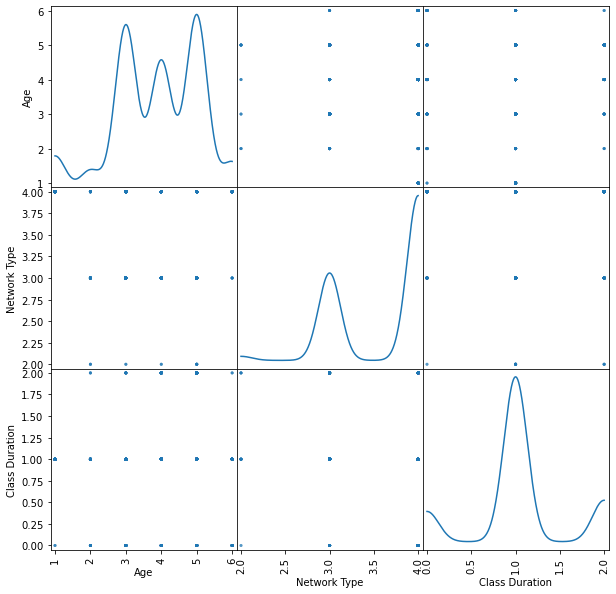

In [148]:
from pandas.plotting import scatter_matrix

Axes = scatter_matrix(data_num, figsize=(10,10), diagonal='kde')

# Set the font sizes of x and y labels
[plt.setp(item.yaxis.get_label(), 'size', 10) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 10) for item in Axes.ravel()]

# Set the tickmark labels
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in Axes.ravel()]

plt.show()

Text(0, 0.5, 'Class Duration')

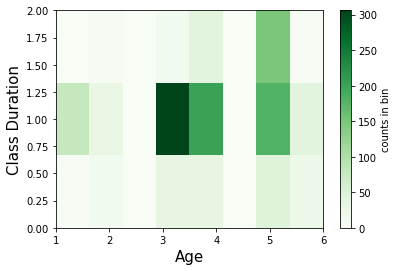

In [175]:
plt.hist2d(data_num['Age'], data_num['Class Duration'], bins=(8,3), cmap='Greens')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Class Duration', fontsize = 15)

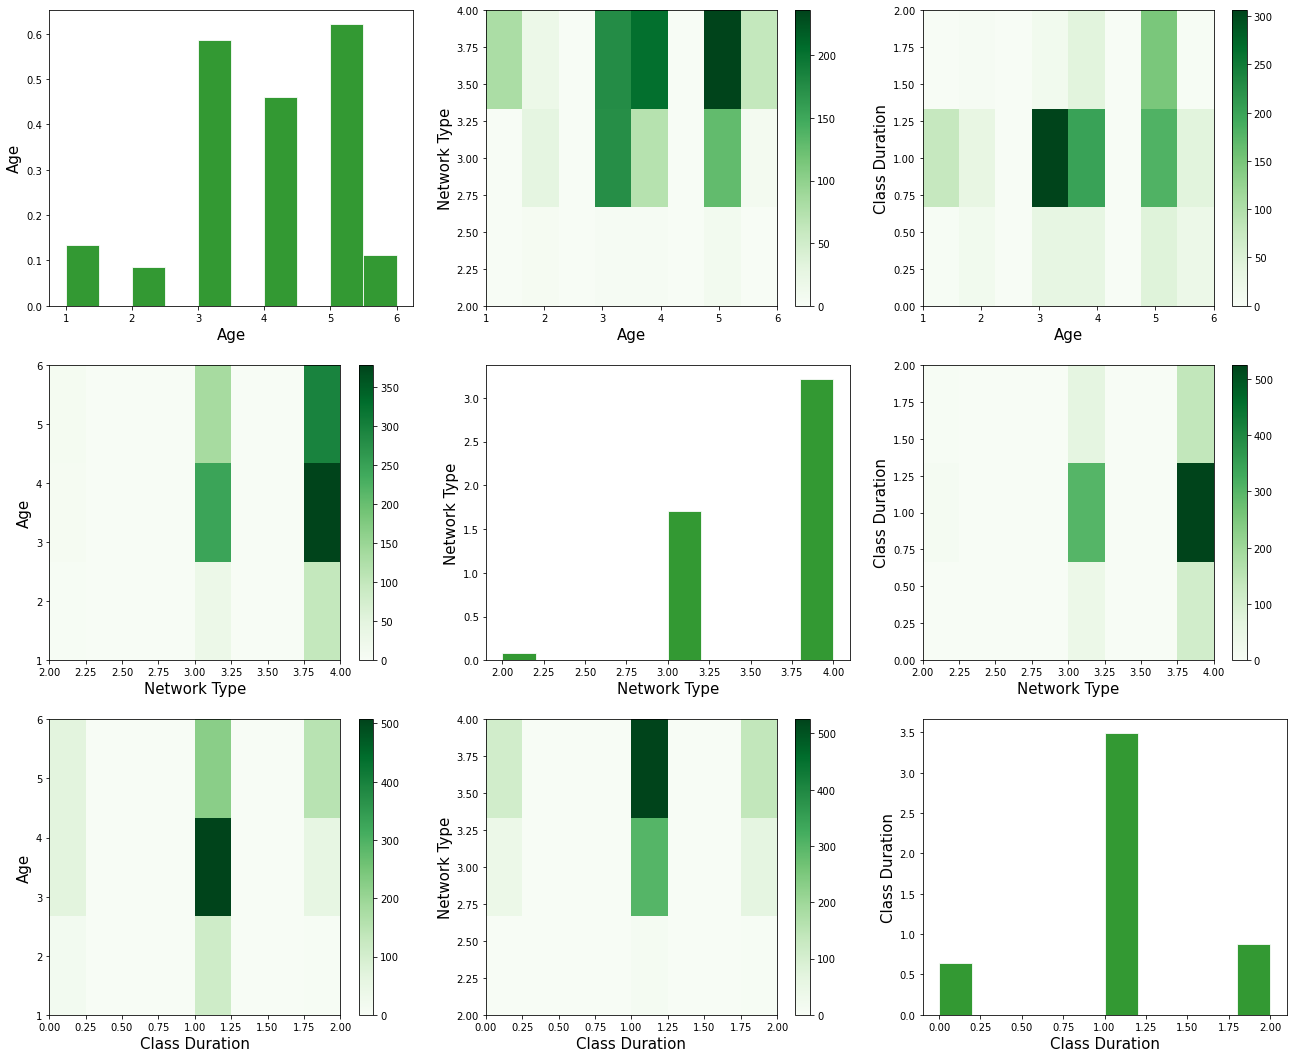

In [191]:
histkwds = {'alpha':0.8, 'bins':10, 'edgecolor':'white'}

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
plt.figure(figsize=(30, 25))

#histograms
plt.subplot(grid[0,0])
plt.hist(data_num['Age'], density=True, bins=10, alpha=0.8, edgecolor='white', color='green')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Age', fontsize = 15)

plt.subplot(grid[1,1])
plt.hist(data_num['Network Type'], density=True, bins=10, alpha=0.8, edgecolor='white', color='green')
plt.xlabel('Network Type', fontsize = 15)
plt.ylabel('Network Type', fontsize = 15)

plt.subplot(grid[2,2])
plt.hist(data_num['Class Duration'], density=True, bins=10, alpha=0.8, edgecolor='white', color='green')
plt.xlabel('Class Duration', fontsize = 15)
plt.ylabel('Class Duration', fontsize = 15)

#row1
plt.subplot(grid[0, 1])  # The first subplot occupies the (0,0) lot.
plt.hist2d(data_num['Age'], data_num['Network Type'], bins=(8,3), cmap='Greens')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Network Type', fontsize = 15)
cb = plt.colorbar()

plt.subplot(grid[0, 2])
plt.hist2d(data_num['Age'], data_num['Class Duration'], bins=(8,3), cmap='Greens')
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Class Duration', fontsize = 15)
cb = plt.colorbar()

#row2
plt.subplot(grid[1, 0])
plt.hist2d(data_num['Network Type'], data_num['Age'], bins=(8,3), cmap='Greens')
plt.xlabel('Network Type', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
cb = plt.colorbar()

plt.subplot(grid[1, 2])
plt.hist2d(data_num['Network Type'], data_num['Class Duration'], bins=(8,3), cmap='Greens')
plt.xlabel('Network Type', fontsize = 15)
plt.ylabel('Class Duration', fontsize = 15)
cb = plt.colorbar()


#row3
plt.subplot(grid[2, 0])
plt.hist2d(data_num['Class Duration'], data_num['Age'], bins=(8,3), cmap='Greens')
plt.xlabel('Class Duration', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
cb = plt.colorbar()

plt.subplot(grid[2, 1])
plt.hist2d(data_num['Class Duration'], data_num['Network Type'], bins=(8,3), cmap='Greens')
plt.xlabel('Class Duration', fontsize = 15)
plt.ylabel('Network Type', fontsize = 15)
cb = plt.colorbar()

plt.show()

In [234]:
def fun(df, figsize, b, binf, color, cmaps):
    
    row = df.shape[0]
    col = df.shape[1]
    
    i=1
    j=1
    
    grid = plt.GridSpec(row, col, hspace=0.2, wspace=0.2)
    plt.figure(figsize=figsize)
    
    for i in range(row):
        for j in range(col):
            if i == j:
                plt.subplot(grid[i,j])
                plt.hist(df[df.columns[i]], density=True, bins=b, alpha=0.8, color=color)
                plt.xlabel(df.columns[i], fontsize = 15)
                plt.ylabel(df.columns[j], fontsize = 15)
                
            else:   
                plt.subplot(grid[i, j])
                plt.hist2d(df[df.columns[i]], df[df.columns[j]], bins=binf, cmap=cmaps)
                plt.xlabel(df.columns[i], fontsize = 15)
                plt.ylabel(df.columns[j], fontsize = 15)
                cb = plt.colorbar()    
    